# Домашнее задание. Pandas

In [42]:
import pandas as pd
df = pd.read_csv('TSLA.csv');

1. Вывести все колонки из DataFrame

In [43]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


2. Посчитать среднюю цену закрытия акций Tesla, в период с открытия по 10.01.2012

In [44]:
df_1 = df.copy()
df_1['Date'] = pd.to_datetime(df_1['Date'])
df_1 = df_1[df_1['Date'] < pd.Timestamp(2012, 1, 10)]
df_1['Close'].mean()

25.649379816537472

3. Вывести график цены закрытия 

<Axes: >

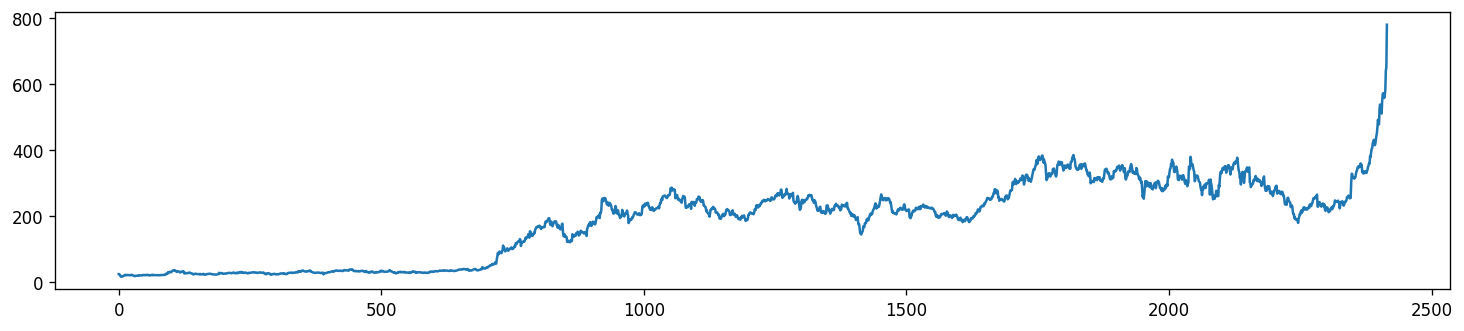

In [45]:
from matplotlib.pyplot import figure
figure(figsize=(15, 3), dpi=120)
df['Close'].plot()

4. Нормализация 

Сейчас вы научитесь нормализовывать данные. Но сначала я объясню, зачем. <br>

Алгоритмы машинного обучения, как правило, работают лучше или сходятся быстрее, когда различные функции (переменные) имеют меньший масштаб. Поэтому перед обучением на них моделей машинного обучения данные обычно нормализуются.

Нормализация также делает процесс обучения менее чувствительным к масштабу функций. Это приводит к улучшению коэффициентов после тренировки.

Этот процесс повышения пригодности функций для обучения путем изменения масштаба называется масштабированием функций.

Вот формула, которую часто применяют для нормализации значений одного столбца:
$$ x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}, $$
где, понятное дело x - значение в конкретной строке выбранного столбца, xmax - максимальное значение этого столбца, а xmin - минимальное значение этого столбца.

Примените эту формулу к столбцу Open (используйте метод apply).

In [48]:
df_2 = df.copy()
max_open = df_2['Open'].max()
min_open = df_2['Open'].min()

def normalize(x):
    return (x - min_open)/(max_open - min_open)

df_2['Open'] = df_2['Open'].apply(normalize)
df_2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,0.004349,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,0.014676,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,0.013474,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,0.010433,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,0.005870,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,0.840012,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,0.850962,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,0.937237,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,0.948764,653.000000,632.520020,650.570007,650.570007,15719300


SMA 5 и 6 задание


<Axes: >

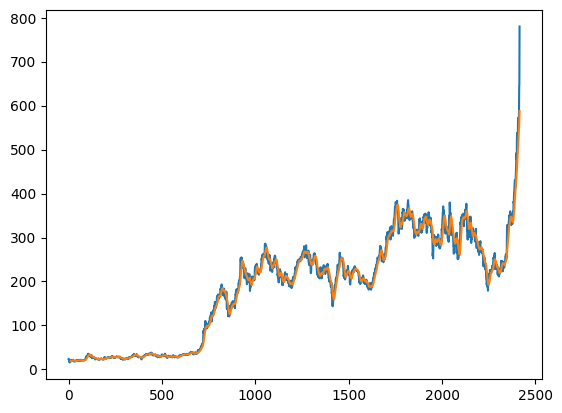

In [47]:
df['Close'].plot()
df['Close'].rolling(window=12).mean().plot()